In [1]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset from pickled files
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("W.pickle","rb")
W = pickle.load(pickle_in)
W=np.asarray(W)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [3]:
#split into train and test datasets
X_train,X_test,W_train,W_test,y_train,y_test=train_test_split(X,W,y,train_size=0.8,test_size=0.2,random_state=123)
print(X_test.shape)
print(W_test.shape)
print(y_test.shape)

(1657, 64, 64, 1)
(1657,)
(1657, 5)


In [4]:
from tensorflow.keras.utils import plot_model
from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 60, 128)  3328        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 128)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   73792       max_pooling2d[0][0]              
_______________________________________________________________________________________

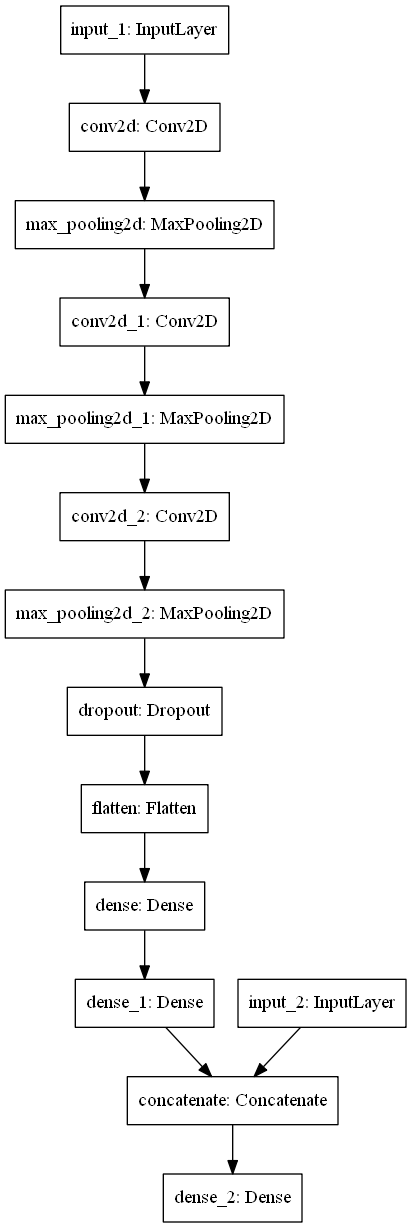

In [5]:
visible1 = Input(shape=(64,64,1))
#visible1 = Input(shape=(100,100,1))
# first feature extractor

conv1 = Conv2D(128, kernel_size=(5,5), activation='relu')(visible1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#dropout1=Dropout(0.3)(pool1)

conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')(pool1)
#conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#dropout2=Dropout(0.3)(pool2)

conv3 = Conv2D(64, kernel_size=(3,3), activation='relu')(pool2)
#conv3 = Conv2D(64, kernel_size=(3,3), activation='relu')
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
dropout3=Dropout(0.2)(pool3)


flat1 = Flatten()(dropout3)
#### New entry to try concatentation
flat2 = Input(shape=(1))



#hidden1 = Dense(64, activation='relu')(merge)
hidden1 = Dense(64, activation='relu')(flat1)
hidden2 = Dense(16, activation='relu')(hidden1)

hidden3 = Concatenate()([hidden2, flat2])
#regress=

## 

#output = Dense(5, activation='softmax')(hidden2)

output = Dense(5, activation='softmax')(hidden3)

model = Model(inputs=(visible1,flat2), outputs=output)
#model = Model(inputs=(visible1), outputs=output)
print(model.summary())
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [8]:
import time
start = time.perf_counter()
print(y_train.shape)

history=model.fit((X_train,W_train), y_train,
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          callbacks=None,class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6626, 5)
Epoch 1/20
94/94 [==============================] - 49s 517ms/step - loss: 0.0792 - accuracy: 0.9743 - val_loss: 0.3553 - val_accuracy: 0.9035
Epoch 2/20
94/94 [==============================] - 50s 534ms/step - loss: 0.1063 - accuracy: 0.9621 - val_loss: 0.3953 - val_accuracy: 0.9155
Epoch 3/20
94/94 [==============================] - 50s 528ms/step - loss: 0.0794 - accuracy: 0.9723 - val_loss: 0.2863 - val_accuracy: 0.9155
Epoch 4/20
94/94 [==============================] - 50s 535ms/step - loss: 0.0634 - accuracy: 0.9765 - val_loss: 0.3122 - val_accuracy: 0.9306
Epoch 5/20
94/94 [==============================] - 47s 498ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.4516 - val_accuracy: 0.9170
Epoch 6/20
94/94 [==============================] - 46s 492ms/step - loss: 0.0554 - accuracy: 0.9819 - val_loss: 0.4598 - val_accuracy: 0.9065
Epoch 7/20
94/94 [==============================] - 42s 443ms/step - loss: 0.0402 - accuracy: 0.9846 - val_loss: 0.3910 - val_accura

In [10]:
score = model.evaluate((X_train,W_train), y_train, verbose=1)

208/208 [==============================] - 9s 43ms/step - loss: 0.0525 - accuracy: 0.9888


In [11]:
score = model.evaluate((X_train,W_train), y_train, verbose=1)

208/208 [==============================] - 9s 42ms/step - loss: 0.0525 - accuracy: 0.9888


In [12]:
print(score)

[0.05254802107810974, 0.9888318777084351]


In [14]:
score = model.evaluate((X_test,W_test), y_test, verbose=1)

52/52 [==============================] - 2s 44ms/step - loss: 0.4806 - accuracy: 0.9191


In [15]:
print(score)

[0.4806404113769531, 0.9191309809684753]


In [16]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
#y_pred=model.predict_classes(X_test)
print(model.predict((X_test,W_test)))
print(model.predict((X_test,W_test))[1][1])
y_pred=np.argmax(model.predict((X_test,W_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
  a[i]=np.where(y_test[i]==1)[0][0]
print(a)
con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

[[2.4026339e-12 3.4226184e-11 1.5375975e-12 1.0000000e+00 5.0312017e-13]
 [9.0545831e-07 4.4190943e-10 4.0136483e-06 2.0278110e-09 9.9999511e-01]
 [5.2509602e-08 1.6118348e-08 1.5850322e-06 3.4168714e-12 9.9999833e-01]
 ...
 [1.5578913e-14 2.1729565e-15 1.5217869e-12 1.0000000e+00 1.7647767e-14]
 [1.7553610e-17 2.5541319e-10 7.4618950e-19 1.0000000e+00 3.1266322e-17]
 [3.3406714e-06 3.3230647e-06 1.1726322e-08 9.9884111e-14 9.9999332e-01]]
4.4190943e-10
[3 4 4 ... 3 3 4]


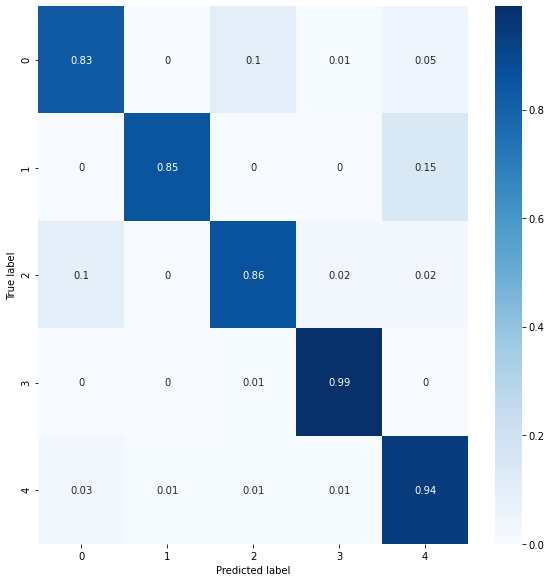

[0.4806404113769531, 0.9191309809684753]


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
score = model.evaluate((X_test,W_test), y_test, verbose=0)
#score = model.evaluate((X_test), y_test, verbose=0)
print(score)

In [20]:

b=np.zeros(len(y_train)).astype(int)
#print(b)
#print(len(y_test))
for i in range(0,len(y_train)):
  b[i]=np.where(y_train[i]==1)[0][0]
print(b)
#con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
#con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

[4 3 4 ... 0 0 4]


In [21]:
len(b)

6626

In [22]:
len(a)

1657